In [1]:
from __future__ import print_function
# import rdkit components
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors

# use IPythonConsole for pretty drawings
from rdkit.Chem.Draw import IPythonConsole

## The next line is commented out 
### because GitHub does not render svg's embedded in notebooks
# IPythonConsole.ipython_useSVG=True
IPythonConsole.ipython_useSVG=False

# for flattening tuples and lists
from itertools import chain

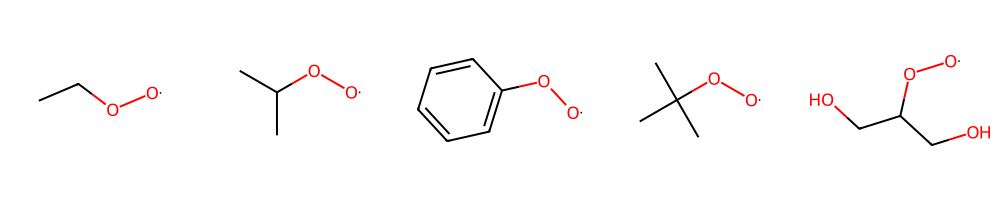

In [2]:
ethanol = Chem.MolFromSmiles('CCO[O]')
isopropanol = Chem.MolFromSmiles('CC(C)O[O]')
phenol = Chem.MolFromSmiles('c1cccc(O[O])c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O[O]')
glycerol = Chem.MolFromSmiles('OCC(O[O])CO')

alcohols = [ethanol, isopropanol, phenol, t_butanol, glycerol]

Draw.MolsToGridImage(alcohols, molsPerRow=5)

In [3]:
# helper functions to avoid typing the same thing over and over
def to_smiles(mol_tuple):
    return tuple(Chem.MolToSmiles(mol) for mol in mol_tuple)

def from_smiles(smiles_tuple):
    return tuple(Chem.MolFromSmiles(smiles) for smiles in smiles_tuple)

Number of unique product sets: 4


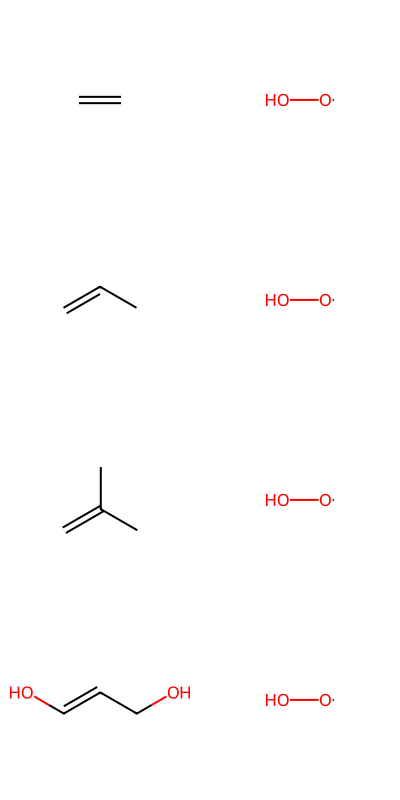

In [4]:
water_elimination_smarts = '[H:5][C:1][C:2][O:3][OX1v1:4]>>[C:1]=[C:2].[OX1v1:3][O:4][H:5]'
water_elimination = AllChem.ReactionFromSmarts(water_elimination_smarts)

# do the reaction on every alcohol in our set
# 1. Add hydrogens
alcohols = list(map(Chem.AddHs, alcohols))
# 2. Run reactions
all_products_tuples = [water_elimination.RunReactants((mol, )) for mol in alcohols]
all_products = list(chain.from_iterable(all_products_tuples))
for mol in chain.from_iterable(all_products):
    # 3. Set implicit hydrogens to false
    for atom in mol.GetAtoms():
        atom.SetNoImplicit(True)
    # 4. Assign radicals
    Chem.AssignRadicals(mol)
    # 5. Sanitize
    Chem.SanitizeMol(mol)
    # 6. Remove hydrogens
    Chem.RemoveHs(mol)

# convert to smiles and back to keep only unique products
all_products_smiles = [to_smiles(mol_tuple) for mol_tuple in all_products]
all_products_unique = [from_smiles(smiles_tuple) for smiles_tuple in set(all_products_smiles)]
nProductSets = len(all_products_unique)
print("Number of unique product sets:",nProductSets)

# draw each product set on its own line
prod_tpl = tuple(chain(*all_products_unique))
Draw.MolsToGridImage(prod_tpl,molsPerRow=water_elimination.GetNumProductTemplates())